**Machine Learning Algorithms that are sensitive to outliers:**
1. Linear Regression
2. Logistic Regression
3. KMeans Clustering
4. Hierarchical Clustering
5. PCA
6. Neural Networks
7. LDA
8. DBScan

**Machine Learning Algorithms that are not sensitive to outliers:**
1. Naive Bayes
2. SVM
3. Decision Tree
4. Ensemble Learning (RF, XGboost, GB)
5. K Nearest Neighbors (KNN)

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('titanic.csv')
data_2 = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.Age.isnull().sum()

177

C:\Users\kc510\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

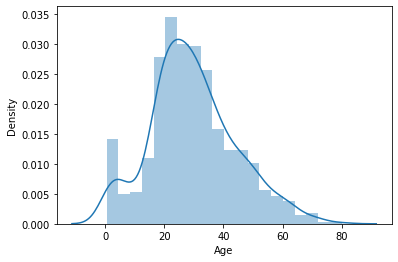

In [4]:
import seaborn as sns
sns.distplot(data.Age.dropna())

## **If data is Normally Distributed**
we use ***Estimate Outliers*** or ***Exreme Value Analysis***.
In this technique whatever is present outside the 3rd SD is considered as an outlier.

### ***1. Upto 3 Standard Deviations***

Text(0, 0.5, 'Number of passengers')

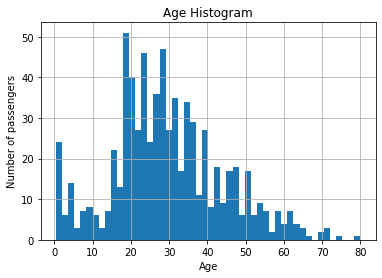

In [5]:
fig = data.Age.hist(bins=50)
fig.set_title('Age Histogram')
fig.set_xlabel('Age')
fig.set_ylabel('Number of passengers')

here we can see that Age is normally distributed or Gaussian distributed.

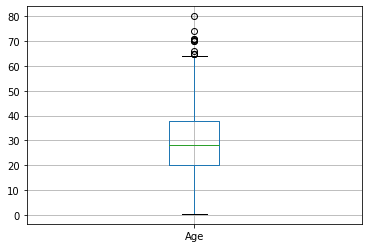

In [6]:
fig = data.boxplot(column='Age')

The dotted points are outliers

In [7]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
# Assuming 'Age' follows a Gaussian Distribution we will calculate the boundaries which differentiate the outliers.

upper_bound = data.Age.mean() + 3*data.Age.std()     #upper_bound is 3rd S.D to the right
lower_bound = data.Age.mean() - 3*data.Age.std()     #lower_bound is 3rd S.D to the left
(lower_bound, upper_bound, data.Age.mean())

(-13.880374349943303, 73.27860964406094, 29.69911764705882)

In Age negative values will never be there

In [9]:
data.loc[data.Age > 73, 'Age'] = 73    

In [57]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'Number of passengers')

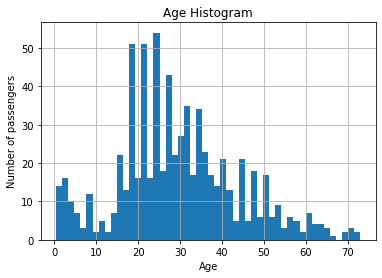

In [10]:
fig = data.Age.hist(bins=50)
fig.set_title('Age Histogram')
fig.set_xlabel('Age')
fig.set_ylabel('Number of passengers')  

### ***2. Z-Score***
The Z-score is a measure of dispersion. It is calculated as the difference between a data point and the mean of the data. The higher the Z-score, the more the data point is away from the mean. </br>
Z = (x - mean) / standard deviation

In [11]:
outliers=[]

def detect_outlier(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for y in data:
        z_score = (y - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [12]:
outlier_pts = detect_outlier(data_2.Age)
outlier_pts

[80.0, 74.0]

##  **If data is skewed**

### ***3. IQR***
The Interquartile range is a measure of statistical dispersion. It is the difference between the 75th and 25th percentile of a data set. The higher the IQR, the more the data set is spread out.</br>
**Steps**
1. Arrange the data in ascending order
2. Calculate first (q1) quartile and third (q3) quartile
3. Calculate the Interquartile range (IQR) i.e. q3-q1
4. Calculate the upper and lower bounds of outliers i.e. q3 + 1.5*IQR and q1 - 1.5*IQR


Anything beyond these bounds is an outlier

Text(0, 0.5, 'Number of passengers')

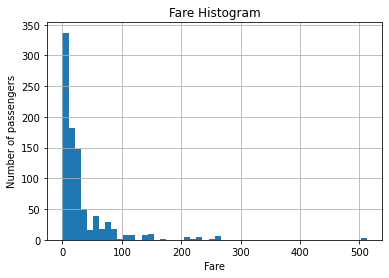

In [14]:
fig = data.Fare.hist(bins=50)
fig.set_title('Fare Histogram')
fig.set_xlabel('Fare')
fig.set_ylabel('Number of passengers')

<AxesSubplot:>

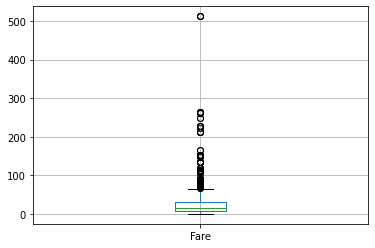

In [15]:
data.boxplot(column='Fare')

Here we have huge amount of outliers

In [16]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [17]:
IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)
IQR

23.0896

In [18]:
lower_bridge = data.Fare.quantile(0.25) - 1.5*IQR
upper_bridge = data.Fare.quantile(0.75) + 1.5*IQR
[lower_bridge, upper_bridge]

[-26.724, 65.6344]

In [19]:
# Extreme Outliers
# When out data is highly skewed, we should take extreme ends based on the IQR into consideration.
lower_bridge = data.Fare.quantile(0.25) - 3*IQR
upper_bridge = data.Fare.quantile(0.75) + 3*IQR
[lower_bridge, upper_bridge]

[-61.358399999999996, 100.2688]

In [20]:
data.loc[data.Fare >= 100, 'Fare'] = 100

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'Number of passengers')

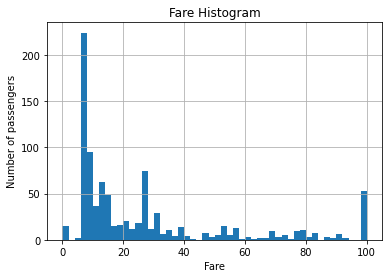

In [22]:
fig = data.Fare.hist(bins=50)
fig.set_title('Fare Histogram')
fig.set_xlabel('Fare')
fig.set_ylabel('Number of passengers')  

## **Now we can apply any machine learning technique after handling missing values.**

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Age','Fare']].fillna(0), data.Survived, test_size=0.3, random_state=0)

In [24]:
# Logistic Regession
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_p = logreg.predict_proba(X_test)

print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print("ROC AUC Score: {}".format(roc_auc_score(y_test, y_pred_p[:,1])))

Accuracy Score: 0.7052238805970149
ROC AUC Score: 0.7149404761904762


In [25]:
# ensemble model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
y_pred_p = rfc.predict_proba(X_test)

print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print("ROC AUC Score: {}".format(roc_auc_score(y_test, y_pred_p[:,1])))

Accuracy Score: 0.7052238805970149
ROC AUC Score: 0.7214880952380953
